# Project: Investigate TMDB Movies 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this notebook am going to explore tmdb movies dataset and provide insights on 
<li>Top 10 genre movies </li>  
<li> The average runtime of the movies by year</li>  
<li> The movies with the most tmdb votes </li>  
<li> Top 10 production companies by number of movies released </li>  
<li> Top 10 directors by movies released </li>  

The  dataset contains
id,
imdb_id,
popularity,
budget,
revenue,
original_title,
cast,
homepage,
director,
tagline,
keywords,
overview,
runtime,
genres,
production_companies,
release_date,
vote_count,
vote_average,
release_year,
budget_adj,
revenue_adj.

In [1]:
#import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In this section of the report, am loading in the data, checking for cleanliness, and then trimming and cleaning your dataset for analysis. 

### General Properties

In [2]:
#load the dataset
df = pd.read_csv('tmdb_movies.csv')

#view the first two rows
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [3]:
#data count column and rows
df.shape

(10866, 21)

In [4]:
#check data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
#check for null values
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [7]:
#check for duplicate values
df.duplicated().sum()

1

### Data Cleaning 

In [8]:
#drop all the duplicate rows
df.drop_duplicates()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00


In [9]:
#we need to drop the unused columns
df.drop(columns = ['homepage', 'imdb_id', 'tagline', 'keywords', 'overview', 'budget_adj', 'revenue_adj'], inplace = True)

#look at the remaining columns
df.head(2)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015


In [10]:
#drop the null values
df.dropna(inplace = True)

In [11]:
#check again for the null values
df.isnull().sum()

id                      0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
dtype: int64

In [12]:
#check the new data shape
df.shape

(9773, 14)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9773 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9773 non-null   int64  
 1   popularity            9773 non-null   float64
 2   budget                9773 non-null   int64  
 3   revenue               9773 non-null   int64  
 4   original_title        9773 non-null   object 
 5   cast                  9773 non-null   object 
 6   director              9773 non-null   object 
 7   runtime               9773 non-null   int64  
 8   genres                9773 non-null   object 
 9   production_companies  9773 non-null   object 
 10  release_date          9773 non-null   object 
 11  vote_count            9773 non-null   int64  
 12  vote_average          9773 non-null   float64
 13  release_year          9773 non-null   int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 1.1+ MB


In [14]:
#save the cleaned dataset
df.to_csv('cleaned_tmdb_movies.csv', index=False)

<a id='eda'></a>
## Exploratory Data Analysis


### 1. Top 10 Movie Genres released

In [15]:
#splitting the genre values, since they are separated by the pipe operator [|]
df['genres'] = df['genres'].apply(lambda x: x.split('|')[0])

df.head(2)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015


In [16]:
#function to plot a pie chat
def plot_pie(df, title):
    df.plot(kind='pie', figsize=(8,8), autopct='%1.0f%%', ylabel = (""))
    plt.title(title, fontweight = 'bold')
    plt.show()

In [17]:
#function to plot a bar chat
def plot_barh(df, xlabel, ylabel, title):
    df.plot(kind ='barh', color = 'tomato', figsize=(8,8))
    plt.xlabel(xlabel, color = 'darkblue', fontsize = 10)
    plt.ylabel(ylabel, color = 'orangered', fontsize = 10)
    plt.title(title, fontweight = 'bold')
    plt.show()

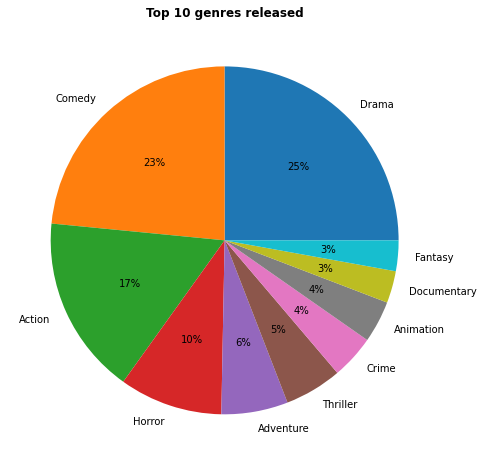

In [18]:
#visualizing pie chart of the Top 10 movie genres
df_10_genres = df['genres'].value_counts()[:10] 
plot_pie(df_10_genres, 'Top 10 genres released')

> I used the above pie chart to visualize the top 10 movie genres by count of movies released. From the chart, we can clearly see that Drama movies were the majority, followed closely by comedy movies.

## 2. Top 10 production companies by total movies released

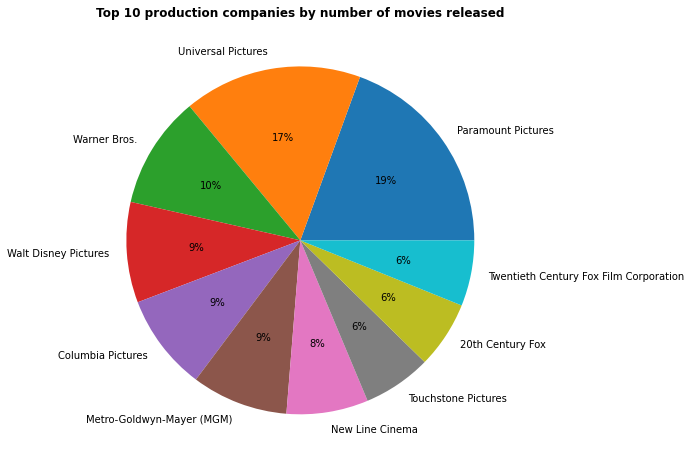

In [19]:
#plotting top 10 production companies
df_10_production = df['production_companies'].value_counts()[:10]
plot_pie(df_10_production,'Top 10 production companies by number of movies released')

> Production companies have been competing for this entertainmemt industry. From the dataset, I wanted to see which production companies have released the majority of the movies and based on the chart, Paramount picture led followed by Universal Pictures.

## 3. Top 10 Directors by number of movies released 

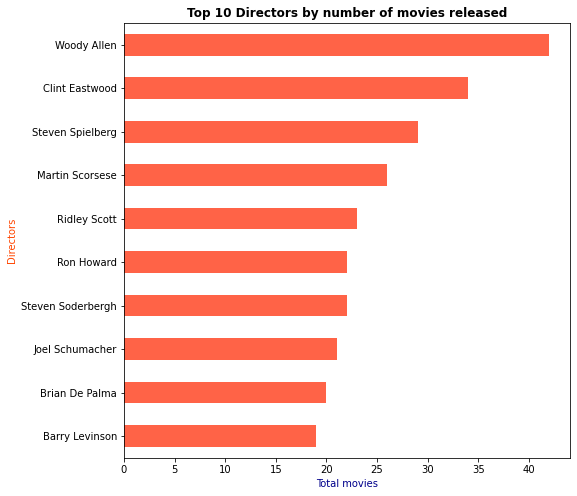

In [20]:
#let's plot the top 10 directors by the total movies released
df_10_directors = df['director'].value_counts()[:10].sort_values()
plot_barh(df_10_directors, 'Total movies', 'Directors','Top 10 Directors by number of movies released')                      

> Woody Allen had the highest number of movies directed and released compared to all other directors.

## 4. Top 10 movies with the most vote count

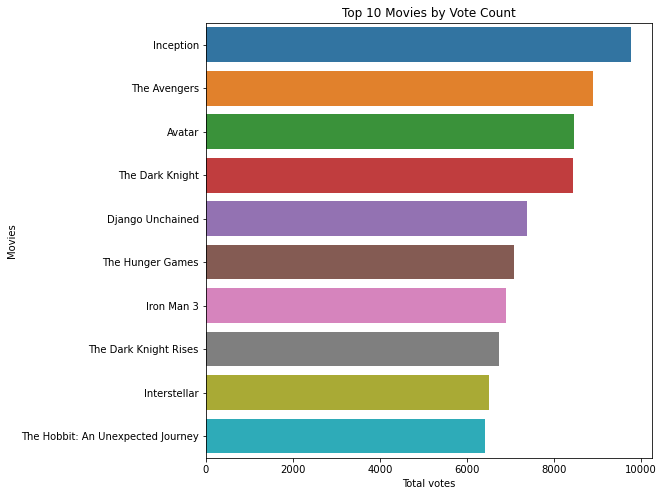

In [21]:
#Top 10 movies with the most vote count
df_10 = df.sort_values('vote_count', ascending=False)[:10] ##get the top 10 movies 
plt.figure(figsize=(8,8))
sns.barplot(data = df_10,  x='vote_count', y='original_title')
plt.xlabel("Total votes")
plt.ylabel("Movies")
plt.title("Top 10 Movies by Vote Count")
plt.show()

> Surprisingly, Inception had the most votes count compared to The Avengers which came second

### 5. Average Movie Runtime by Year

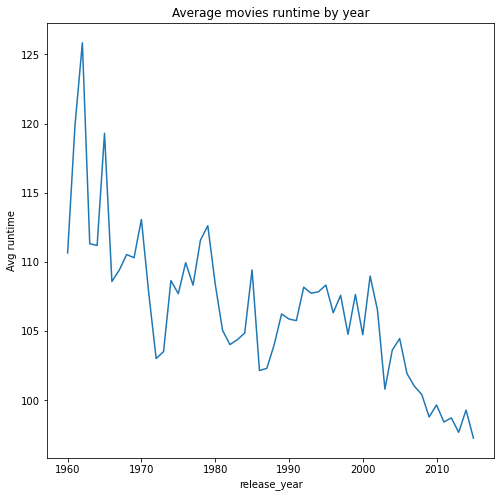

In [26]:
#Visualizing a lineplot on the average runtime throught time
df.groupby('release_year')['runtime'].mean().plot(kind = "line",figsize=(8,8),
                                                  title = "Average movies runtime by year",
                                                  ylabel = "Avg runtime");

> Clearly the average runtime of movies has been decreasing over the years. Based on assumptions, movies have continously become expensive to produce and people have shorter concentration spans.

## 6. Top 10 movies in Profit Margin

In [23]:
#movies that made the highest profits 
#define profits
df['profit'] = df['revenue'] - df['budget']
#check the new column and values
df.loc[:, ['original_title', 'profit']]

,original_title,profit
0,Jurassic World,1363528810
1,Mad Max: Fury Road,228436354
2,Insurgent,185238201
3,Star Wars: The Force Awakens,1868178225
4,Furious 7,1316249360
...,...,...
10861,The Endless Summer,0
10862,Grand Prix,0
10863,Beregis Avtomobilya,0
10864,"What's Up, Tiger Lily?",0


In [24]:
#noticing a couple of 0 values in the revenue column
len(df[df['revenue']==0]) 

5022

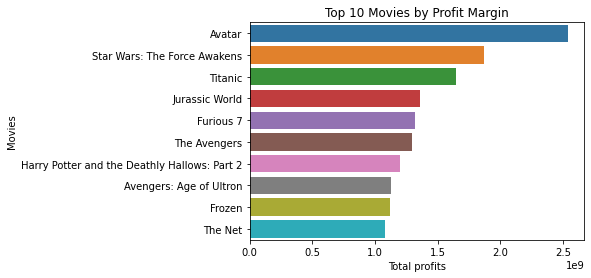

In [25]:
#sort profits row to get the top 10 
df_profit = df.sort_values('profit', ascending=False)[:10]
#visualizing the profits table
sns.barplot(data = df_profit,  x='profit', y='original_title')
plt.xlabel("Total profits")
plt.ylabel("Movies")
plt.title("Top 10 Movies by Profit Margin")
plt.show()

<a id='conclusions'></a>
## Conclusions

After analysis on the over 10,000 movie dataset, below are some of the insights made:

> Drama is the most released movie genre by (25%), followed closely by comedy at (23%)

> **Paramount pictures** produced the most movies by value count at 19%, then followed by **Universal Pictures** at 17%

> **Woody Allen** produced most total movies as a director

> **Inception** had the highest vote count

> The average movie runtime has over the years been reducing

> **Avatar** movie made the highest profits

Limitations 
> At least 5002 rows in the revenue column have the values as 0. This comprises at least half of the dataset